**MUSHROOM CLASSIFICATION**

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.
This dataset can be found on Kaggle

1)IMPORT NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../input/mushroom-classification/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


2)DATA PREPROCESSING

In [3]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no null values

In [4]:
df['class'].unique()

array(['p', 'e'], dtype=object)

There are two categories, poisonous and edible

Let us encode the binary categories to zeroes and ones

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df.columns:
    if len(df[col].value_counts())==2:
        
        df[col]=labelencoder.fit_transform(df[col])
    
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,1,p,1,0,1,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,1,a,1,0,0,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,1,l,1,0,0,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,1,p,1,0,1,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,0,n,1,1,0,k,...,s,w,w,p,w,o,e,n,a,g


For the rest of the cloumns with more than one categories, let us employ one hot encoding

In [6]:
df=pd.get_dummies(df)
df.head()

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
X=df.drop(['class'],axis=1)
X.head()

,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
Y=df['class']
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [9]:
Y=Y.to_frame()
Y.head()

,class
0,1
1,0
2,0
3,1
4,0


In [10]:
X.describe()

,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.415559,0.974151,0.161497,0.309207,0.567208,0.055638,0.000492,0.387986,0.101920,0.003939,...,0.153619,0.497292,0.210734,0.387494,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.492848,0.158695,0.368011,0.462195,0.495493,0.229235,0.022185,0.487321,0.302562,0.062641,...,0.360605,0.500023,0.407855,0.487208,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


3) K-MEANS CLUSTERING

This is an unsupervised classification technique and hence does not require labels

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
kmeans=KMeans(n_clusters=2)

In [13]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
clusters=kmeans.predict(X)

In [15]:
cluster_df = pd.DataFrame()

cluster_df['cluster'] = clusters
cluster_df['class'] = Y
cluster_df.head()

,cluster,class
0,1,1
1,1,0
2,1,0
3,1,1
4,1,0


In [16]:
cluster0_df=cluster_df[cluster_df['cluster']==0]
cluster0_df.head()

,cluster,class
1816,0,1
2128,0,1
2178,0,1
2238,0,1
2385,0,1


In [17]:
cluster1_df=cluster_df[cluster_df['cluster']==1]
cluster1_df.head()

,cluster,class
0,1,1
1,1,0
2,1,0
3,1,1
4,1,0


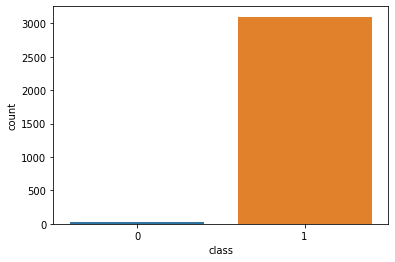

In [18]:
sns.countplot(x="class", data=cluster0_df)


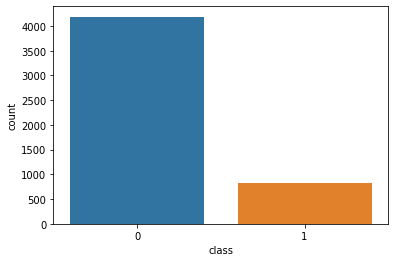

In [19]:
sns.countplot(x='class',data=cluster1_df)

We can conclude that the first cluster has almost all the poisonous mushrooms and almost no edible mushrooms. However, the second cluster has almost all the edible mushrooms and around 500 poisonous mushrooms.

4) LOGISTIC REGRESSION

This is a supervised learning algorithm which works well for binary classification as well as multi-class classification

In [20]:
Y.describe()

,class
count,8124.000000
mean,0.482029
std,0.499708
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Let us split our data into training and testing, with 20% of data allocated for testing

In [21]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.20)

In [22]:
#K-Means Clustering with two clusters
kmeans = KMeans(n_clusters=2)

#Logistic Regression with no special parameters
logreg = LogisticRegression()

In [23]:
kmeans.fit(train_X)

logreg.fit(train_X, train_y)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

5) MAKING PREDICTIONS ON OUR MODELS

In [24]:
kmeans_pred = kmeans.predict(test_X)

logreg_pred = logreg.predict(test_X)

In [25]:
test_y

,class
4811,1
4072,1
7574,1
4510,1
6989,0
...,...
4681,1
2606,0
563,0
338,0


6) MODEL EVALUATION

In [30]:
#This DataFrame will allow us to visualize our results.
result_df = pd.DataFrame()

#The column containing the correct class for each mushroom in the test set, 'test_y'.
result_df['test_y'] = test_y['class'] 

#The predictions made by K-Means on the test set, 'test_X'.
result_df['kmeans_pred'] = kmeans_pred
#The column below will tell us whether each prediction made by our K-Means model was correct.
result_df['kmeans_correct'] = result_df['kmeans_pred'] == result_df['test_y']

#The predictions made by Logistic Regression on the test set, 'test_X'.
result_df['logreg_pred'] = logreg_pred
#The column below will tell us whether each prediction made by our Logistic Regression model was correct.
result_df['logreg_correct'] = result_df['logreg_pred'] == result_df['test_y']

In [31]:
result_df


,test_y,kmeans_pred,kmeans_correct,logreg_pred,logreg_correct
4811,1,1,True,1,True
4072,1,1,True,1,True
7574,1,1,True,1,True
4510,1,1,True,1,True
6989,0,0,True,0,True
...,...,...,...,...,...
4681,1,1,True,1,True
2606,0,0,True,0,True
563,0,0,True,0,True
338,0,0,True,0,True


Text(0.5, 1.0, 'K-Means Clustering')

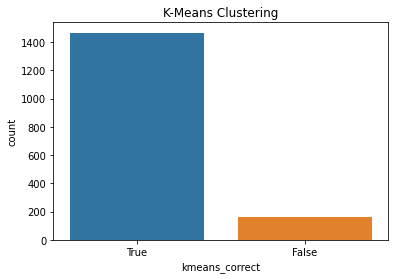

In [34]:
sns.countplot(x=result_df['kmeans_correct'], order=[True,False]).set_title('K-Means Clustering')


Text(0.5, 1.0, 'Logistic Regression')

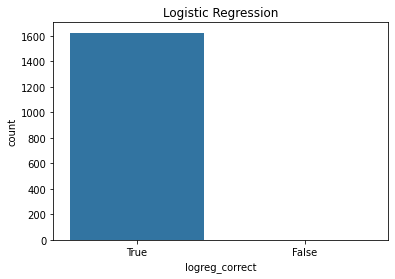

In [35]:
sns.countplot(x=result_df['logreg_correct'], order=[True,False]).set_title('Logistic Regression')

7) VERDICT

Logistic Regression is the clear winner